## 2. Explorative Datenanalyse

In [1]:
# Module import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data (clean)/df_clean.csv')

In [3]:
# Berechnung der deskriptiven Statistiken für die numerischen Spalten
descriptive_stats = df.describe()

# Anzeige der Ergebnisse
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Baujahr,106264.0,2017.072979,2.118252,1991.0,2016.00,2017.00,2019.00,2020.00
Preis (£),106264.0,16863.101718,9780.112751,450.0,10190.00,14578.50,20882.00,159999.00
Kilometerstand,106264.0,37366.988350,34000.035877,1.0,12430.00,28187.00,52219.50,519816.00
Steuer (£),106264.0,123.210118,60.057257,0.0,125.00,145.00,145.00,580.00
Verbrauch (l/100km),106264.0,4.526439,3.227075,0.5,3.83,4.33,4.99,784.05
Motorgröße (l),106264.0,1.664960,0.558149,0.0,1.20,1.60,2.00,6.60


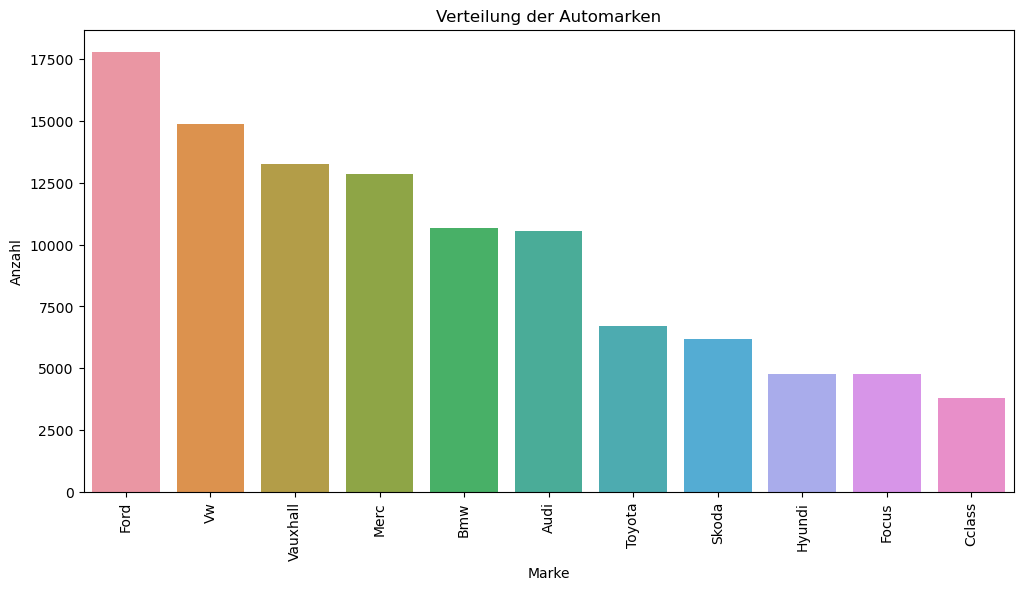

In [4]:
# Einstellen der Plot-Größe
plt.figure(figsize=(12, 6))

# Visualisierung der Verteilung der Marken
sns.countplot(data=df, x='Marke', order=df['Marke'].value_counts().index)

# Hinzufügen von Titel und Labels
plt.title('Verteilung der Automarken')
plt.xlabel('Marke')
plt.ylabel('Anzahl')
plt.xticks(rotation=90)
plt.show()

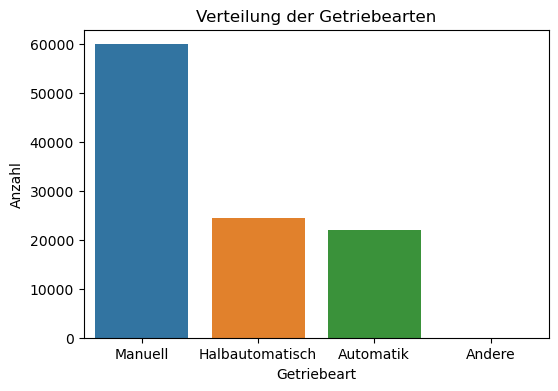

In [5]:
# Einstellen der Plot-Größe
plt.figure(figsize=(6, 4))

# Visualisierung der Verteilung der Getriebearten
sns.countplot(data=df, x='Getriebe', order=df['Getriebe'].value_counts().index)

# Hinzufügen von Titel und Labels
plt.title('Verteilung der Getriebearten')
plt.xlabel('Getriebeart')
plt.ylabel('Anzahl')
plt.show()


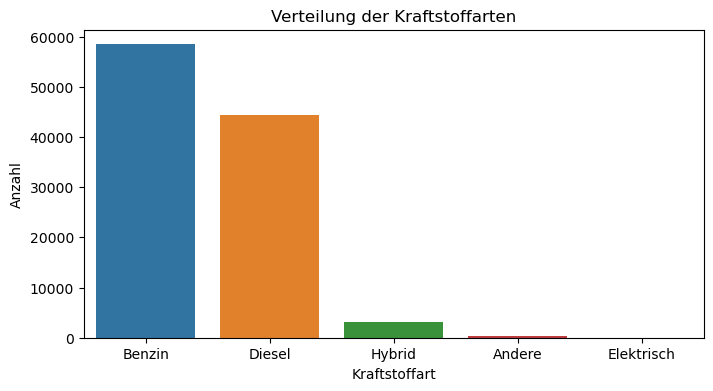

In [6]:
# Einstellen der Plot-Größe
plt.figure(figsize=(8, 4))

# Visualisierung der Verteilung der Kraftstoffarten
sns.countplot(data=df, x='Kraftstoffart', order=df['Kraftstoffart'].value_counts().index)

# Hinzufügen von Titel und Labels
plt.title('Verteilung der Kraftstoffarten')
plt.xlabel('Kraftstoffart')
plt.ylabel('Anzahl')
plt.show()


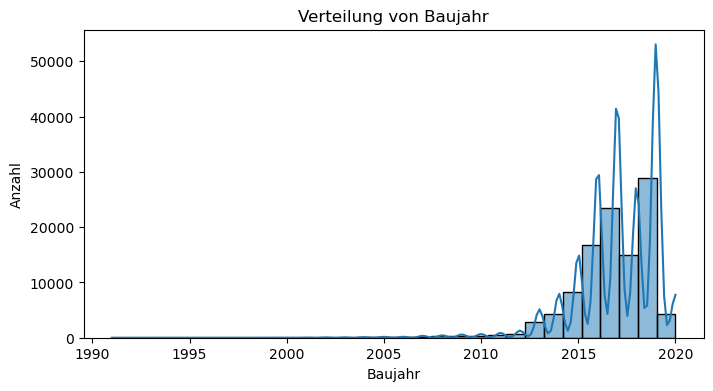

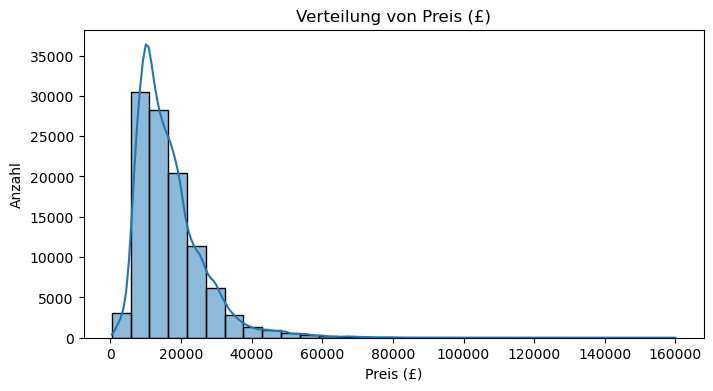

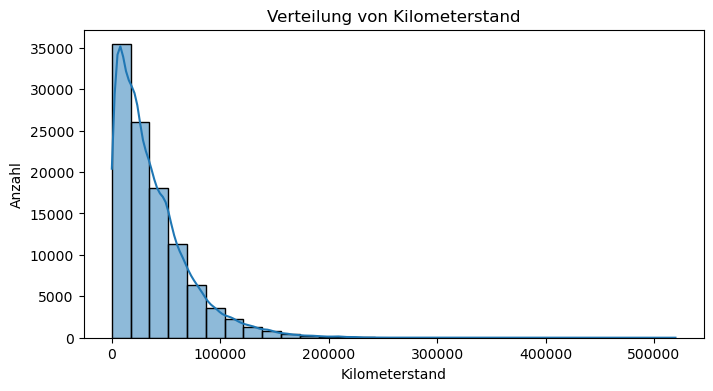

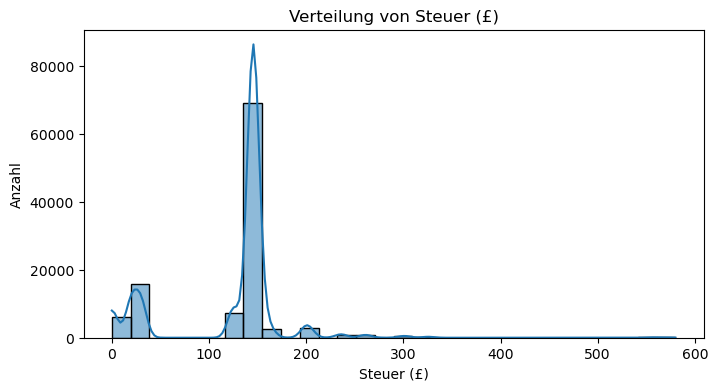

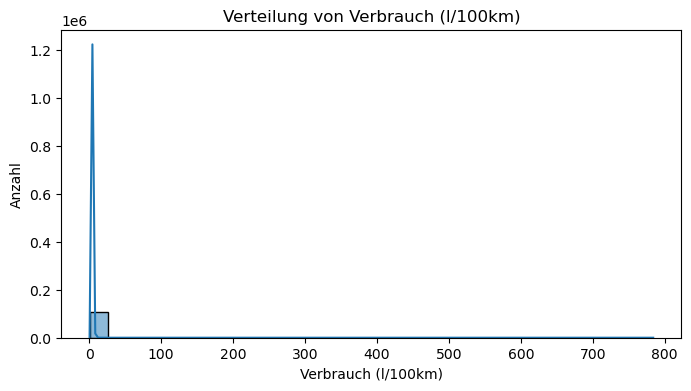

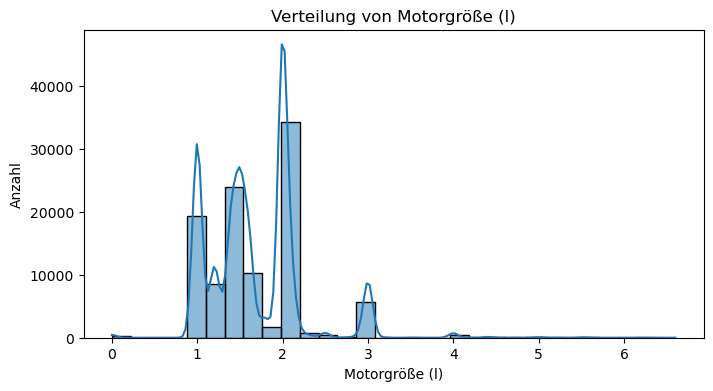

In [7]:
# Liste der numerischen Merkmale
numerical_features = ['Baujahr', 'Preis (£)', 'Kilometerstand', 'Steuer (£)', 'Verbrauch (l/100km)', 'Motorgröße (l)']

# Erstellen von Histogrammen für jedes numerische Merkmal
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Verteilung von {feature}')
    plt.xlabel(feature)
    plt.ylabel('Anzahl')
    plt.show()


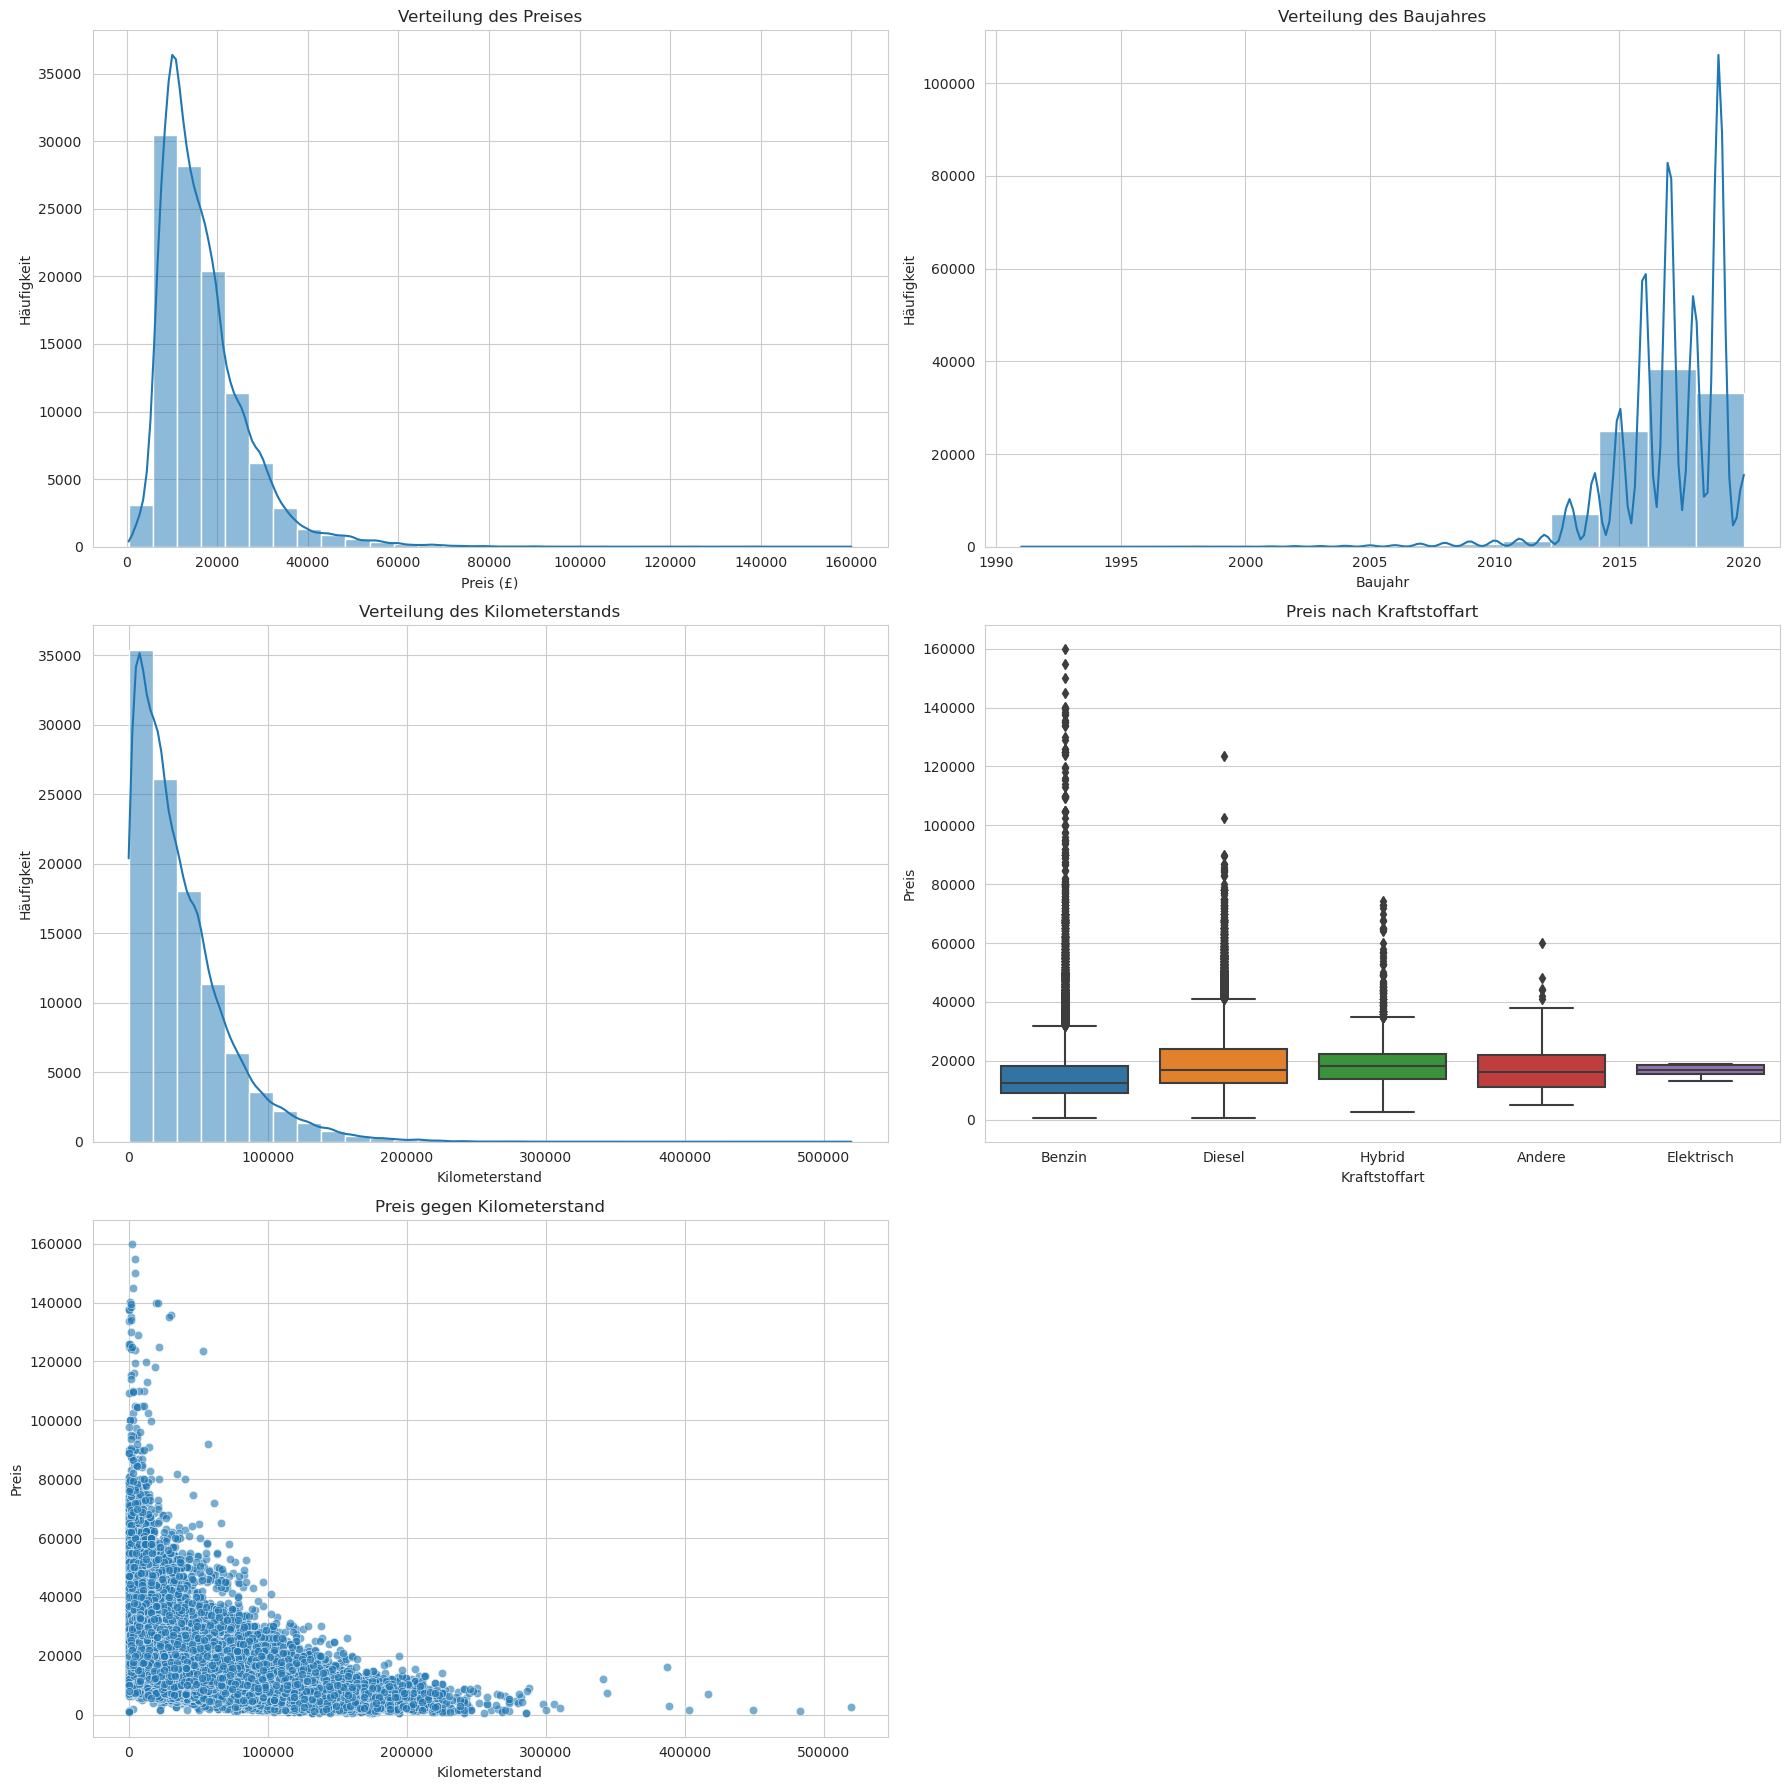

In [8]:
# Setzen eines Stils für die Plots
sns.set_style("whitegrid")

# Erstellen von Subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Histogramm des Preises
sns.histplot(df['Preis (£)'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Verteilung des Preises')
axes[0, 0].set_xlabel('Preis (£)')
axes[0, 0].set_ylabel('Häufigkeit')

# Histogramm des Baujahres
sns.histplot(df['Baujahr'], bins=15, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Verteilung des Baujahres')
axes[0, 1].set_xlabel('Baujahr')
axes[0, 1].set_ylabel('Häufigkeit')

# Histogramm des Kilometerstands
sns.histplot(df['Kilometerstand'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Verteilung des Kilometerstands')
axes[1, 0].set_xlabel('Kilometerstand')
axes[1, 0].set_ylabel('Häufigkeit')

# Boxplot des Preises nach Kraftstoffart
sns.boxplot(x='Kraftstoffart', y='Preis (£)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Preis nach Kraftstoffart')
axes[1, 1].set_xlabel('Kraftstoffart')
axes[1, 1].set_ylabel('Preis')

# Scatterplot von Preis gegen Kilometerstand
sns.scatterplot(x='Kilometerstand', y='Preis (£)', data=df, ax=axes[2, 0], alpha=0.6)
axes[2, 0].set_title('Preis gegen Kilometerstand')
axes[2, 0].set_xlabel('Kilometerstand')
axes[2, 0].set_ylabel('Preis')

# Entfernen des leeren Subplots
axes[2, 1].remove()

plt.tight_layout()
plt.show()


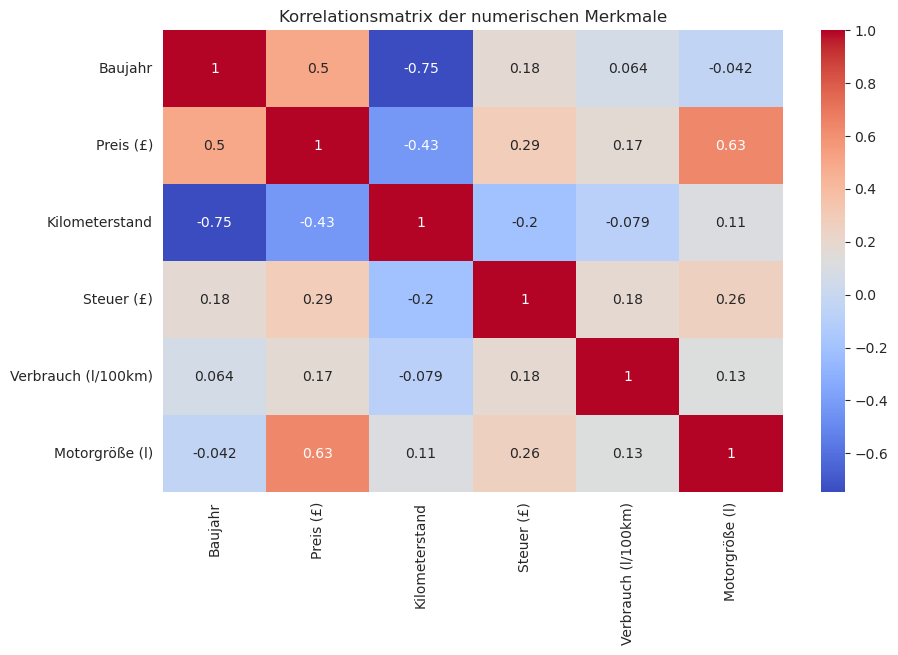

In [9]:
# Berechnung der Korrelationsmatrix
correlation_matrix = df[numerical_features].corr()

# Erstellen einer Heatmap zur Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der numerischen Merkmale')
plt.show()
